# 📚 Imports
---

In [190]:
import pandas as pd
import numpy as np
import re
from unidecode import unidecode

import collections
import matplotlib.pyplot as plt

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# 📖 Data
---

In [191]:
real = pd.read_csv('data/real.csv')
fake = pd.read_csv('data/fake.csv')

In [192]:
real.head()

,tweet
0,sun downs technical director: al-ahly respecte...
1,shawky gharib after the tie with enppi: our go...
2,"egyptian sports news today, wednesday 1/25/202..."
3,the main referees committee of the egyptian fo...
4,"haji bari, the striker of the future team, is ..."


In [193]:
fake.tail()

,tweet
19994,by hitting the referee
19995,and instead of assassinating him.. they assass...
19996,"honestly, the goalkeeper deal is not the best\..."
19997,haha goal and no bangura (:
19998,i swear by god almighty\nmessi will not come t...


In [194]:
print(real.shape)
print(fake.shape)

(21869, 1)
(19999, 1)


In [195]:
print(fake.isna().sum())
print(real.isna().sum())

tweet    11
dtype: int64
tweet    6
dtype: int64


# ♻️ Data Cleaning
---

### Drop null values

In [196]:
fake.dropna(inplace = True)
real.dropna(inplace = True)

### Assign a number to real (0) or false (1)

In [197]:
fake['fake'] = 1
real['fake'] = 0

### Concatenating the datasets

In [198]:
df = pd.concat([real, fake], ignore_index = True)
df.head()

,tweet,fake
0,sun downs technical director: al-ahly respecte...,0
1,shawky gharib after the tie with enppi: our go...,0
2,"egyptian sports news today, wednesday 1/25/202...",0
3,the main referees committee of the egyptian fo...,0
4,"haji bari, the striker of the future team, is ...",0


### Text cleaning

In [200]:
# Variable to replace all characters that are not letters or whitespace
regex = re.compile('[^a-z\s]')
# Convert text to lower case
df['text'] = df['tweet'].str.lower()
# Removes all characters that are not letters or spaces
df['text'] = df['text'].apply(lambda x: regex.sub('', x))
# Removes all characters between square brackets
df['text'] = df['text'].str.replace('[%s]', '', regex = True)
# Remove the accents
df['text'] = df['text'].apply(lambda x: regex.sub('', unidecode(x)))
# Remove http
df['text'] = df['text'].str.replace('http', '', regex = True)
# Remove words with less than 3 characters
df['text'] = df['text'].apply(lambda x: ' '.join([w for w in x.split() if len(w) > 2]))

### Removing stopwords

In [201]:
# Tokenization
df['text'] = df['text'].apply(word_tokenize)

# Removing stopwords
stop_words = set(stopwords.words('english'))
df['text'] = df['text'].apply(lambda x: [word for word in x if word not in stop_words])

### Word normalization

In [202]:
# Word normalization
stemmer = SnowballStemmer('english')
df['text'] = df['text'].apply(lambda x: [stemmer.stem(word) for word in x])

# Joining the words back into a single text
df['text'] = df['text'].apply(lambda x: ' '.join(x))

# 📊 Top 10 most used words
---

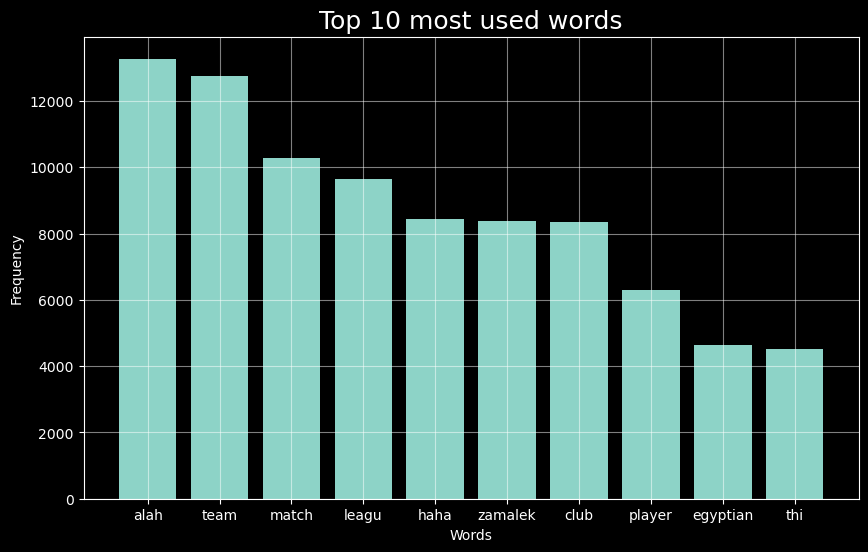

In [203]:
words = []
for text in df['text']:
    words.extend(text.split())
word_count = collections.Counter(words)
top_words = dict(word_count.most_common(10))

# Figure Size
plt.figure(figsize = (10, 6))
# Dark Background
plt.style.use('dark_background')

# Create the Barplot
plt.bar(range(len(top_words)), list(top_words.values()), align = 'center')

# Creating a y axis with words
plt.xticks(range(len(top_words)), list(top_words.keys()))
# Grid Opacity
plt.grid(alpha = 0.5)
# Title
plt.title('Top 10 most used words', fontsize = 18)
# Labels
plt.xlabel('Words')
plt.ylabel('Frequency')
# Show
plt.show()

# 🏋️  Training
---

### Separating Data for Sorting with CountVectorizer

In [303]:
# Split X and Y
x = np.array(df['text'])
y = np.array(df['fake'])

# Convert text to numerical
cv = CountVectorizer()
X = cv.fit_transform(x)

# Split Train and Test
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.15, random_state = 7)

### Training

In [304]:
# Models
mnb = MultinomialNB()
bnb = BernoulliNB()

mnb.fit(xtrain, ytrain)
bnb.fit(xtrain, ytrain)

BernoulliNB()

### Prediction

In [305]:
# Predictions
pred_mnb = mnb.predict(xtest)
pred_bnb = bnb.predict(xtest)

# 📋 Results
---

### MultinomialNB

In [306]:
print(f'Multinomia Accuracy: {accuracy_score(ytest, pred_mnb)}')
print('-' * 55)
print(classification_report(ytest, pred_mnb))

Multinomia Accuracy: 0.941382605925454
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.96      0.93      0.94      3259
           1       0.93      0.95      0.94      3019

    accuracy                           0.94      6278
   macro avg       0.94      0.94      0.94      6278
weighted avg       0.94      0.94      0.94      6278



### BernoulliNB

In [307]:
print(f'Bernoulli Accuracy: {accuracy_score(ytest, pred_bnb)}')
print('-' * 55)
print(classification_report(ytest, pred_bnb))

Bernoulli Accuracy: 0.9399490283529787
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.91      0.94      3259
           1       0.91      0.97      0.94      3019

    accuracy                           0.94      6278
   macro avg       0.94      0.94      0.94      6278
weighted avg       0.94      0.94      0.94      6278



# 🏁 Thank you! Feel free to criticize! 🏁